# Video Game Sales Through 2016 exploration
## by Christopher James

## Preliminary Wrangling

This dataset contains sales and Metacritic rankings for all video game sales through 2016. The wrangling for this was done on the notebook file 'video game wrangle.ipynb'. A summary of this can be found in the file 'wrangle_report.pdf.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read csv file into dataframe
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016_master.csv')

In [3]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(16712, 16)
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object
                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 16 columns):
Name               16712 non-null object
Platform           16712 non-null object
Year_of_Release    16443 non-null float64
Genre              16712 non-null object
Publisher          16658 non-null object
NA_Sales           16712 non-null float64
EU_Sales           16712 non-null float64
JP_Sales           16712 non-null float64
Other_Sales        16712 non-null float64
Global_Sales       16712 non-null float64
Critic_Score       8136 non-null float64
Critic_Count       8136 non-null float64
User_Score         7589 non-null float64
User_Count         7589 non-null float64
Developer          10094 non-null object
Rating             9948 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### What is the structure of your dataset?

There are 16,712 video games that were released from 1980 through the end of 2016. The metacritic ratings don't generally start until 1999-2000 because that is when the website first came out. The dataset consists of the following 16 columns: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, and Rating.

### What is/are the main feature(s) of interest in your dataset?

I am interested in exploring what attributes affect game sales.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be looking deeper into the platform, genre, release year, the sales by region, and the various rankings.

## Univariate Exploration

In [5]:
# Create seperate dataframes by filtering out all regional sales for games that were not available in their respected countries.
na_sales = df.query('NA_Sales > 0')
eu_sales = df.query('EU_Sales > 0')
jp_sales = df.query('JP_Sales > 0')
other_sales = df.query('Other_Sales > 0')

In [6]:
print(np.log10(na_sales['NA_Sales'].describe()), np.log10(eu_sales['EU_Sales'].describe()),
      np.log10(jp_sales['JP_Sales'].describe()), np.log10(other_sales['Other_Sales'].describe()))

count    4.086573
mean    -0.443064
std     -0.029928
min     -2.000000
25%     -1.221849
50%     -0.853872
75%     -0.468521
max      1.616581
Name: NA_Sales, dtype: float64 count    4.035149
mean    -0.650594
std     -0.214151
min     -2.000000
25%     -1.698970
50%     -1.154902
75%     -0.698970
max      1.461799
Name: EU_Sales, dtype: float64 count    3.792392
mean    -0.679338
std     -0.319469
min     -2.000000
25%     -1.522879
50%     -1.154902
75%     -0.721246
max      1.009451
Name: JP_Sales, dtype: float64 count    4.004880
mean    -1.106572
std     -0.628969
min     -2.000000
25%     -2.000000
50%     -1.698970
75%     -1.154902
max      1.024075
Name: Other_Sales, dtype: float64


First, I will begin by plotting the distributions of all the regional sales numbers.

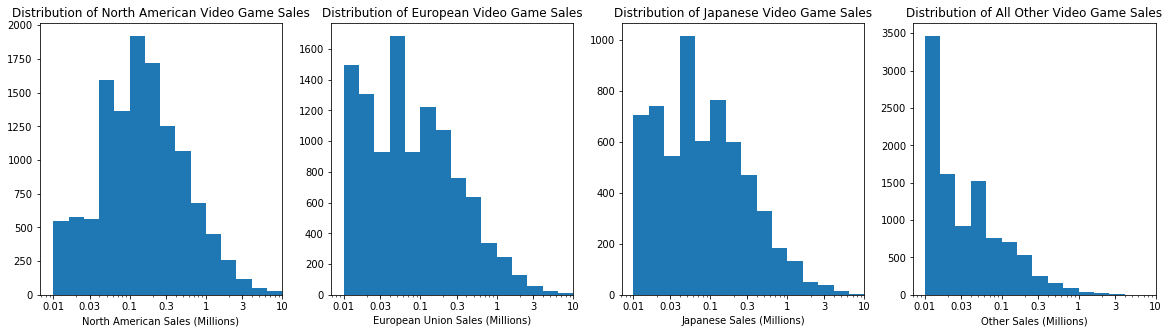

In [7]:
plt.figure(figsize = [20, 5])
# plot distribution of North American Sales
plt.subplot(1, 4, 1)
bins = 10 ** np.arange(-2, 1.61+.1, .2)
ticks = [0.01,0.03,0.1, 0.3, 1, 3, 10, 30, 100]
labels = ["{}".format(val) for val in ticks]

plt.hist(data = na_sales, x = 'NA_Sales', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(right = 10)
plt.title('Distribution of North American Video Game Sales')
plt.xlabel('North American Sales (Millions)')

# plot distribution of European Union Sales
plt.subplot(1, 4, 2)
bins = 10 ** np.arange(-2, 1.46+.1, .2)

plt.hist(data = eu_sales, x = 'EU_Sales', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(right = 10)
plt.title('Distribution of European Video Game Sales')
plt.xlabel('European Union Sales (Millions)')

# plot distribution of Japanese Sales
plt.subplot(1, 4, 3)
bins = 10 ** np.arange(-2, 1.01+.1, .2)

plt.hist(data = jp_sales, x = 'JP_Sales', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(right = 10)
plt.title('Distribution of Japanese Video Game Sales')
plt.xlabel('Japanese Sales (Millions)')

# plot distribution of all other Sales
plt.subplot(1, 4, 4)
bins = 10 ** np.arange(-2, 1.02+.1, .2)

plt.hist(data = other_sales, x = 'Other_Sales', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(right = 10)
plt.title('Distribution of All Other Video Game Sales')
plt.xlabel('Other Sales (Millions)');

All 4 of these charts have been plotted on a log scale due to how skewed they were.

The North American sales distribution started out at slightly above 500 and stayed there until getting past roughly 30k copies sold. The peak occurs between 100k and 300k copies sold, before rapidly descending until the 10 million sold mark.

The European Union Sales distribution started out quite high with many games selling between 10k and 30k copies. The peak here occurs between 30k and 100k copies sold, before falling through the 10 million sold mark  Also notable here is that video games as a whole seem to be less popular in Europe even though the population roughly equal to the North Americas.

The Japenese sales distribution, like the EU, starts out on an elevated level before falling and then peaking between 30k and 100k sold, before falling through the 10 million sold mark.

The sales of all other countries have very different characteristics. The distribution is right skewed even when plotted on a log scale. It peaks at 10k sold and drops until it reaches 3 million sold.

Next I will plot the distribution of Metacritic scores. 

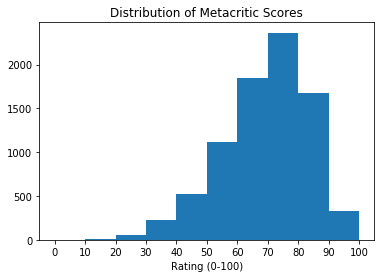

In [8]:
# Plot distribution of Metacritic scores.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Critic_Score', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Metacritic Scores')
plt.xlabel('Rating (0-100)');

There are no games here so bad that they get ratings of 0-10. Starting at 10, there is a fairly rapid rise in the ratings distribution until it peaks between 70-80. One note of interest is the rapid decline from 80-90 to 90-100. Next, I will look at the distribution of Metacritic user scores.

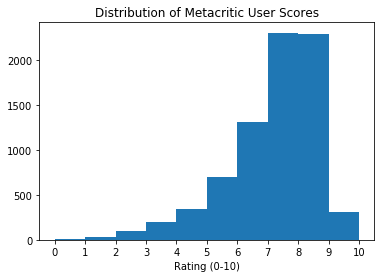

In [9]:
# Plot distribution of Metacritic user scores
bins = np.arange(0, 10 + 1, 1)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'User_Score', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Metacritic User Scores')
plt.xlabel('Rating (0-10)');

This distribution mostly follows the one for critic ratings, at first slowly rising then rapidly rising until peaking between 7-8. One important diference here is that the ratings for 8-9 are virtually as large, making the fall to 9-10 an even bigger drop. Next I will investigate the distribution based on the year of release. 

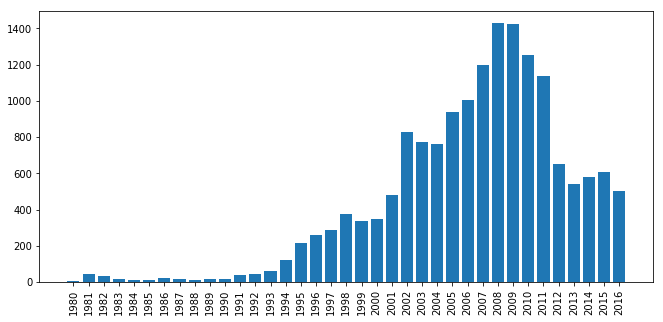

In [10]:
# Plot the distribution of games based on release year.
plt.figure(figsize = [11, 5])
year_count = df.groupby('Year_of_Release')['Name'].count()
height = year_count.values
labels = year_count.index.values.astype(int).tolist()
position = np.arange(1, 37+1, 1)

plt.bar(position, height)
plt.xticks(position, labels, rotation = 90);

This chart illustrates the increasing popularity of video games over the last 36 years. One point of interest here is the decrease in the number of games released after the peak in 2008. Next, I will look at the distribution of games based on the platform they came out on.

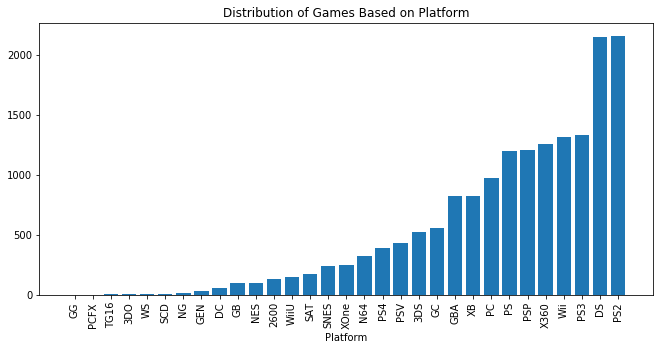

In [11]:
# Plot the distribution of games based on what platform they were released on.
plt.figure(figsize = [11, 5])
platform_count = df.groupby('Platform')['Name'].count().sort_values()
height = platform_count.values
labels = platform_count.index.values.tolist()
position = np.arange(1, 31+1, 1)

plt.bar(position, height)
plt.title('Distribution of Games Based on Platform')
plt.xlabel('Platform')
plt.xticks(position, labels, rotation = 90);

As the chart shows, platforms that did not succeed had the lowest number of releases. The PS2 and the DS sold the most hardware of any system ever released, which is why more publishers would want to release games for those systems. Please note that the PS4 and The XOne were released at the end of 2013, which would explain the low numbers for them. Next, I will explore the distribution of games based on the genre.

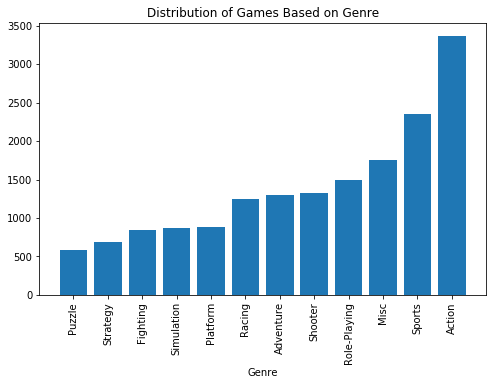

In [12]:
# Plot the distribution of games based on the genre.
plt.figure(figsize = [8, 5])
genre_count = df.groupby('Genre')['Name'].count().sort_values()
height = genre_count.values
labels = genre_count.index.values.tolist()
position = np.arange(1, 12+1, 1)

plt.bar(position, height)
plt.title('Distribution of Games Based on Genre')
plt.xlabel('Genre')
plt.xticks(position, labels, rotation = 90);

Action and sports are the 2 genres with the most game releases. It will be interesting to explore the possible coorelation between number of games and sales numbers. Finally, I will look at the distribution of games based on the content rating.

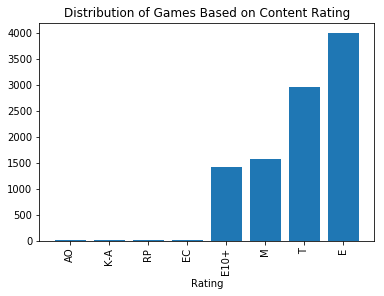

In [13]:
# Plot the distribution of games based on the content rating.
rating_count = df.groupby('Rating')['Name'].count().sort_values()
height = rating_count.values
labels = rating_count.index.values.tolist()
position = np.arange(1, 8+1, 1)

plt.bar(position, height)
plt.title('Distribution of Games Based on Content Rating')
plt.xlabel('Rating')
plt.xticks(position, labels, rotation = 90);

Games rated 'E' are the most common, followed by 'T'. The 'E' rating was implemented in 1998 while 'E10' was in 2005. The 'E' rating replaced 'K-A', whose ratings are not available. 'RP' is given to games who have yet to be rated. Here, it appears there are a few that never were. 

### Discuss your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

North America has a much lower number of games selling between 10k and 30k units than the other charted regions. The chart of all other regions, which is to say the rest of the world, shows a right skewed distribution, even when plotted at log scale. It peaks at 10k units and rapidly declines from there, with few selling more than 1 million. Both the Metacritic ratings and user ratings had extremely steep declines when going from 80%-90% to 90%-100%. With the user ratings, there is a higher number of games in the 80%-90% range than with the critic ratings. This also means that users like most games more than most critics. There was also a dramatic decrease in the number of games released per year after the peak in 2008, perhaps coinciding with the Great Recession. What's surprising is that as of 2016, those levels have failed to recover. All of the charts of regional game sales had to be converted to log scale because they were extremely right skewed.

## Bivariate Exploration

First, I will look at games sales broken down by Metacritic score.

In [14]:
# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

C:\Users\MalcolmReynolds\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


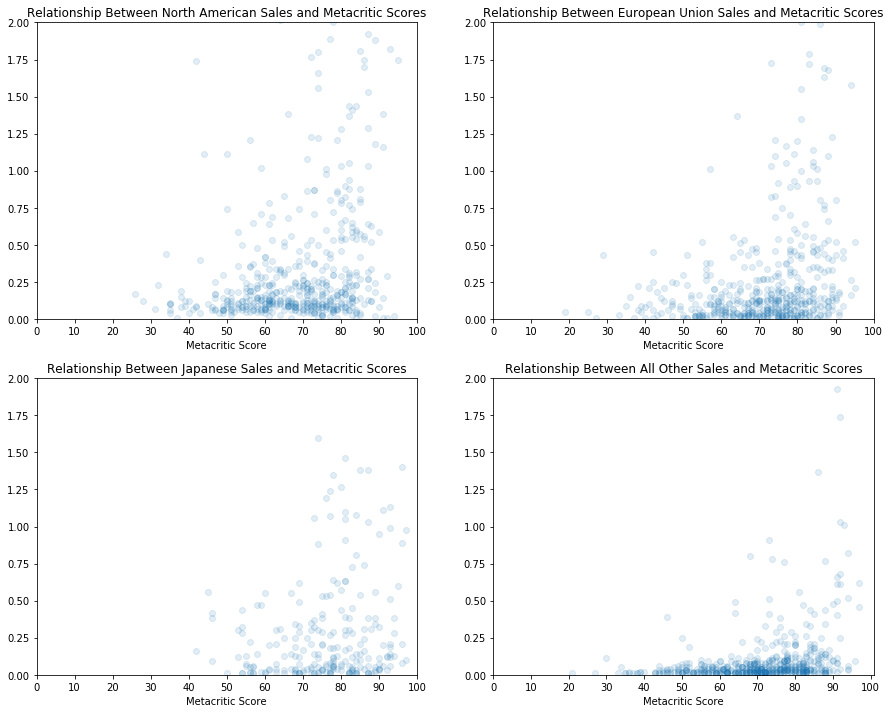

In [15]:
plt.figure(figsize = [15, 12])
position = np.arange(0, 100+1, 10)
labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
# Plot relationship between North American sales and the Metacritic score.
na_sample = df_sample(na_sales, 1000)
plt.subplot(2, 2, 1)
plt.scatter(data = na_sample, x = 'Critic_Score', y = 'NA_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between North American Sales and Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylim(bottom = 0, top = 2)
# Plot relationship between European Union sales and the Metacritic score.
eu_sample = df_sample(eu_sales, 1000)
plt.subplot(2, 2, 2)
plt.scatter(data = eu_sample, x = 'Critic_Score', y = 'EU_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between European Union Sales and Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylim(bottom = 0, top = 2)
# Plot relationship between Japanese sales and the Metacritic score.
jp_sample = df_sample(jp_sales, 1000)
plt.subplot(2, 2, 3)
plt.scatter(data = jp_sample, x = 'Critic_Score', y = 'JP_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between Japanese Sales and Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylim(bottom = 0, top = 2)
# Plot relationship between All Other sales and the Metacritic score.
other_sample = df_sample(other_sales, 1000)
plt.subplot(2, 2, 4)
plt.scatter(data = other_sample, x = 'Critic_Score', y = 'Other_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between All Other Sales and Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylim(bottom = 0, top = 2);

Despite the fact that most of the high sellers are in the top 50% of Metacritic scores, the same is also true for the majority of all games. This is true for all regions. There appears to be little cooreleation between sales numbers and Metacritic scores. I do not believe this warrants any further investigation. Next, I will explore the relationship between sales numbers and user score.

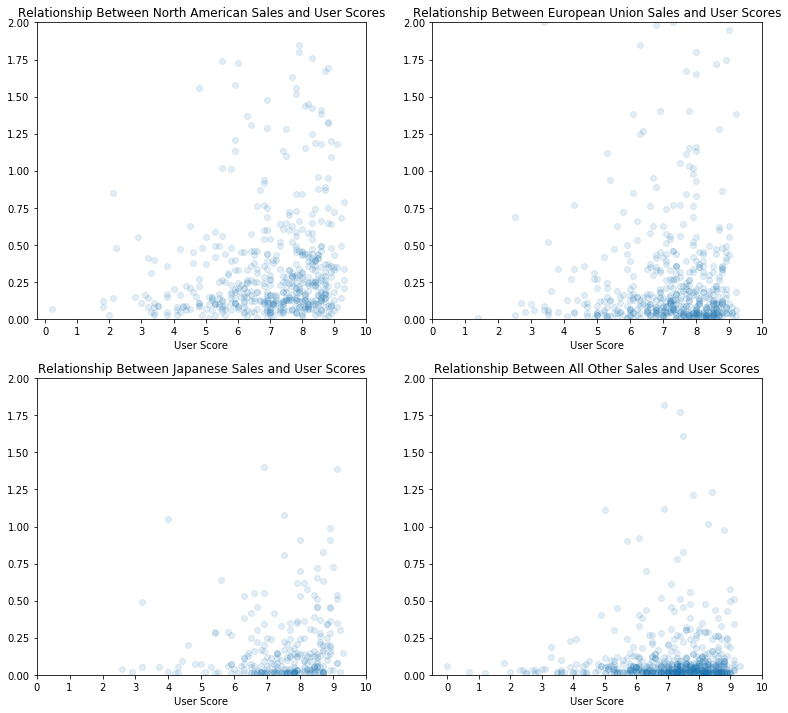

In [16]:
plt.figure(figsize = [13, 12])
position = np.arange(0, 10+1, 1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
# Plot relationship between North American sales and the user scores.
na_sample = df_sample(na_sales, 1000)
plt.subplot(2, 2, 1)
plt.scatter(data = na_sample, x = 'User_Score', y = 'NA_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between North American Sales and User Scores')
plt.xlabel('User Score')
plt.ylim(bottom = 0, top = 2)
# Plot relationship between European Union sales and the user scores.
eu_sample = df_sample(eu_sales, 1000)
plt.subplot(2, 2, 2)
plt.scatter(data = eu_sample, x = 'User_Score', y = 'EU_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between European Union Sales and User Scores')
plt.xlabel('User Score')
plt.ylim(bottom = 0, top = 2)
# Plot relationship between Japanese sales and the user scores.
jp_sample = df_sample(jp_sales, 1000)
plt.subplot(2, 2, 3)
plt.scatter(data = jp_sample, x = 'User_Score', y = 'JP_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between Japanese Sales and User Scores')
plt.xlabel('User Score')
plt.ylim(bottom = 0, top = 2)
# Plot relationship between all other sales and the user scores.
other_sample = df_sample(other_sales, 1000)
plt.subplot(2, 2, 4)
plt.scatter(data = other_sample, x = 'User_Score', y = 'Other_Sales', alpha = 1/8)
plt.xticks(position, labels)
plt.title('Relationship Between All Other Sales and User Scores')
plt.xlabel('User Score')
plt.ylim(bottom = 0, top = 2);

Much like with the Metacritic score, there appears to be little to no coorelation between user score and sales numbers. Gamers are no more likely to base their buying decisions on the opinions of their peers than they are professional critics. Also like the metacritic score, this does not warrant further investigation. Next I will plot the relationship between sales numbers and the content rating of the games.

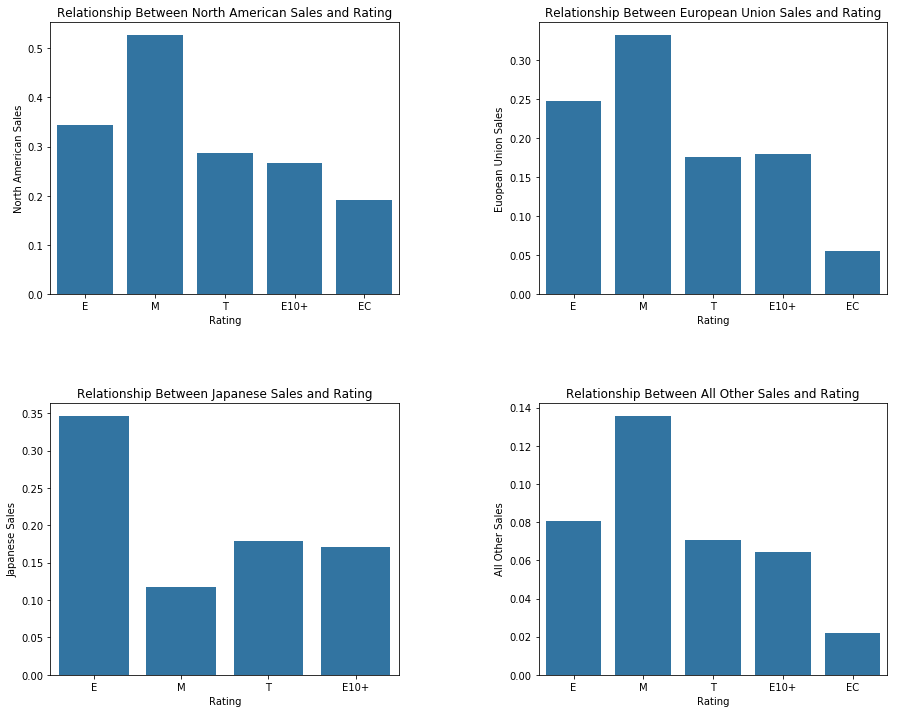

In [17]:
# Remove the rating 'K-A', as that data is not available for this set. Also removing 'RP' and 'AO'.


na_noka = na_sales.query('Rating != ["K-A", "AO", "RP"]')
eu_noka = eu_sales.query('Rating != ["K-A", "AO", "RP"]')
jp_noka = jp_sales.query('Rating != ["K-A", "AO", "RP"]')
other_noka = other_sales.query('Rating != ["K-A", "AO", "RP"]')

fig, axes = plt.subplots(2, 2, figsize = [15, 12])
axes = axes.flatten()
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.4)

# Plot relationship between North American Sales numbers and rating.
ax1 = sb.barplot(data = na_noka, x = 'Rating', y = 'NA_Sales', ax = axes[0], ci = None, color = base_color)
ax1.set_title('Relationship Between North American Sales and Rating')
ax1.set_ylabel('North American Sales')
# Plot relationship between European Union Sales numbers and rating.
ax2 = sb.barplot(data = eu_noka, x = 'Rating', y = 'EU_Sales', ax = axes[1], ci = None, color = base_color)
ax2.set_title('Relationship Between European Union Sales and Rating')
ax2.set_ylabel('Euopean Union Sales')
# Plot relationship between Japanese Sales numbers and rating.
ax3 = sb.barplot(data = jp_noka, x = 'Rating', y = 'JP_Sales', ax = axes[2], ci = None, color = base_color)
ax3.set_title('Relationship Between Japanese Sales and Rating')
ax3.set_ylabel('Japanese Sales')
# Plot relationship between All Other Sales numbers and rating.
ax4 = sb.barplot(data = other_noka, x = 'Rating', y = 'Other_Sales', ax = axes[3], ci = None, color = base_color)
ax4.set_title('Relationship Between All Other Sales and Rating')
ax4.set_ylabel('All Other Sales');

In North America and the European Union, rated 'M' games have the highest mean sales, while 'EC' has the lowest. In Japan, the highest is 'E', while the lowest is 'M'. In all other regions, the highest is 'M', while the lowest is 'EC'. Now, I will plot the relationship between platform and sales.

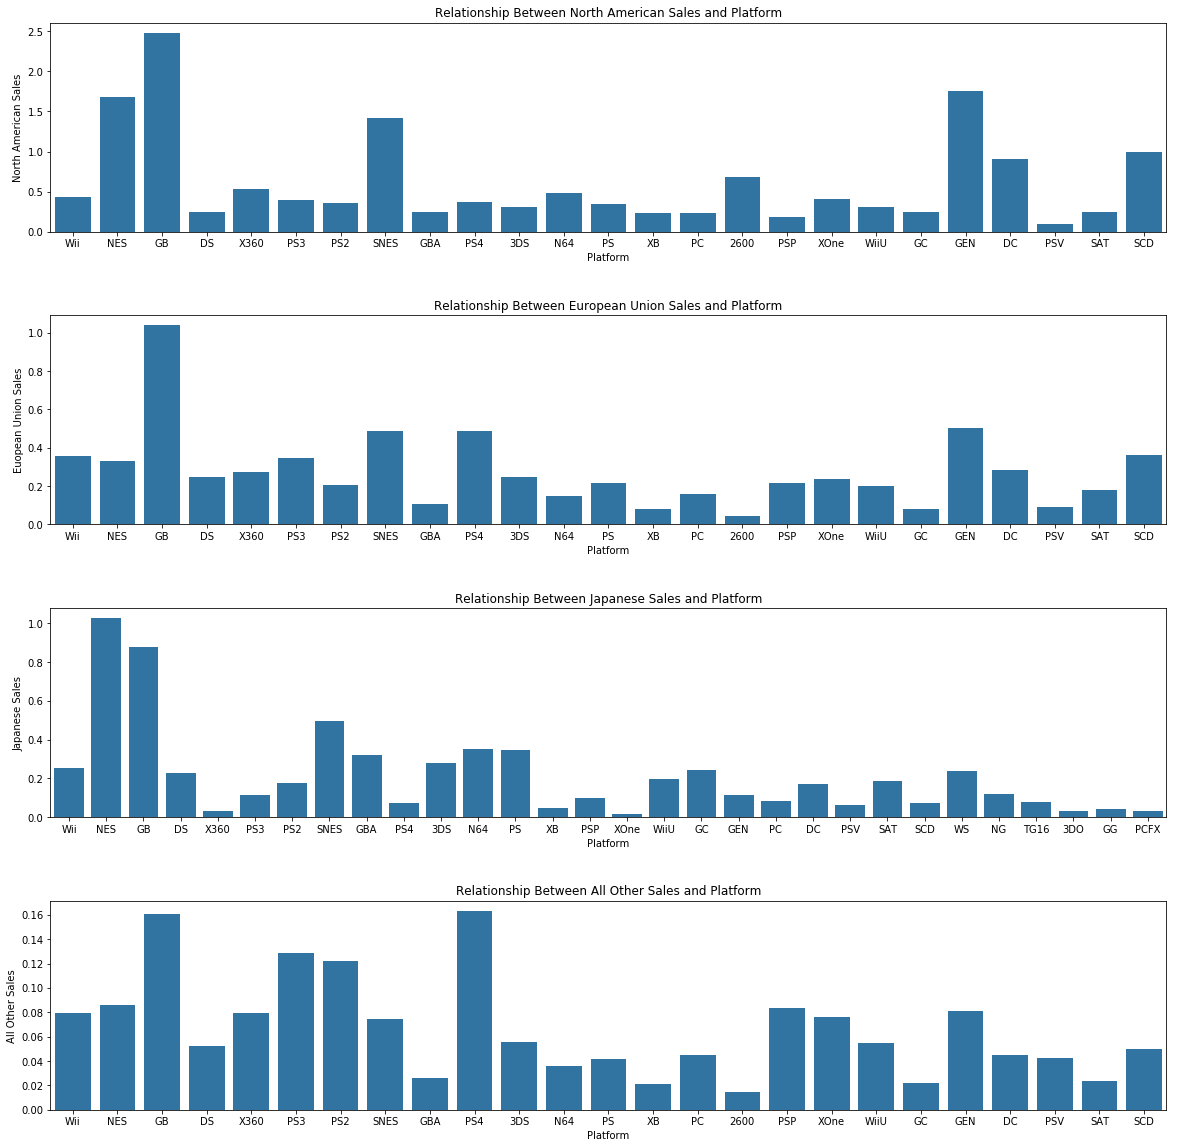

In [18]:
fig, axes = plt.subplots(4, 1, figsize = [20, 20])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.4)

# Plot relationship between North American Sales numbers and Platform.
ax1 = sb.barplot(data = na_sales, x = 'Platform', y = 'NA_Sales', ax = axes[0], ci = None, color = base_color)
ax1.set_title('Relationship Between North American Sales and Platform')
ax1.set_ylabel('North American Sales')
# Plot relationship between European Union Sales numbers and platform.
ax2 = sb.barplot(data = eu_sales, x = 'Platform', y = 'EU_Sales', ax = axes[1], ci = None, color = base_color)
ax2.set_title('Relationship Between European Union Sales and Platform')
ax2.set_ylabel('Euopean Union Sales')
# Plot relationship between Japanese Sales numbers and platform.
ax3 = sb.barplot(data = jp_sales, x = 'Platform', y = 'JP_Sales', ax = axes[2], ci = None, color = base_color)
ax3.set_title('Relationship Between Japanese Sales and Platform')
ax3.set_ylabel('Japanese Sales')
# Plot relationship between All Other Sales numbers and platform.
ax4 = sb.barplot(data = other_sales, x = 'Platform', y = 'Other_Sales', ax = axes[3], ci = None, color = base_color)
ax4.set_title('Relationship Between All Other Sales and Platform')
ax4.set_ylabel('All Other Sales');

In North America, the two platforms with the highest mean game sales are the NES and the GB, both Nintendo systems, while the two lowest are the psp and the psv, both Sony handhelds. In the European Union, the two highest are the GB and the GEN, while the two lowest are the 2600 and the GC. In Japan, the two highest are the NES and the GB, while the two lowest are the XONE and the PCFX. In all other regions, the two highest are the GB and the PS4, while the two lowest are the XB and the 2600. Next, I will plot the relationship between sales and genre.

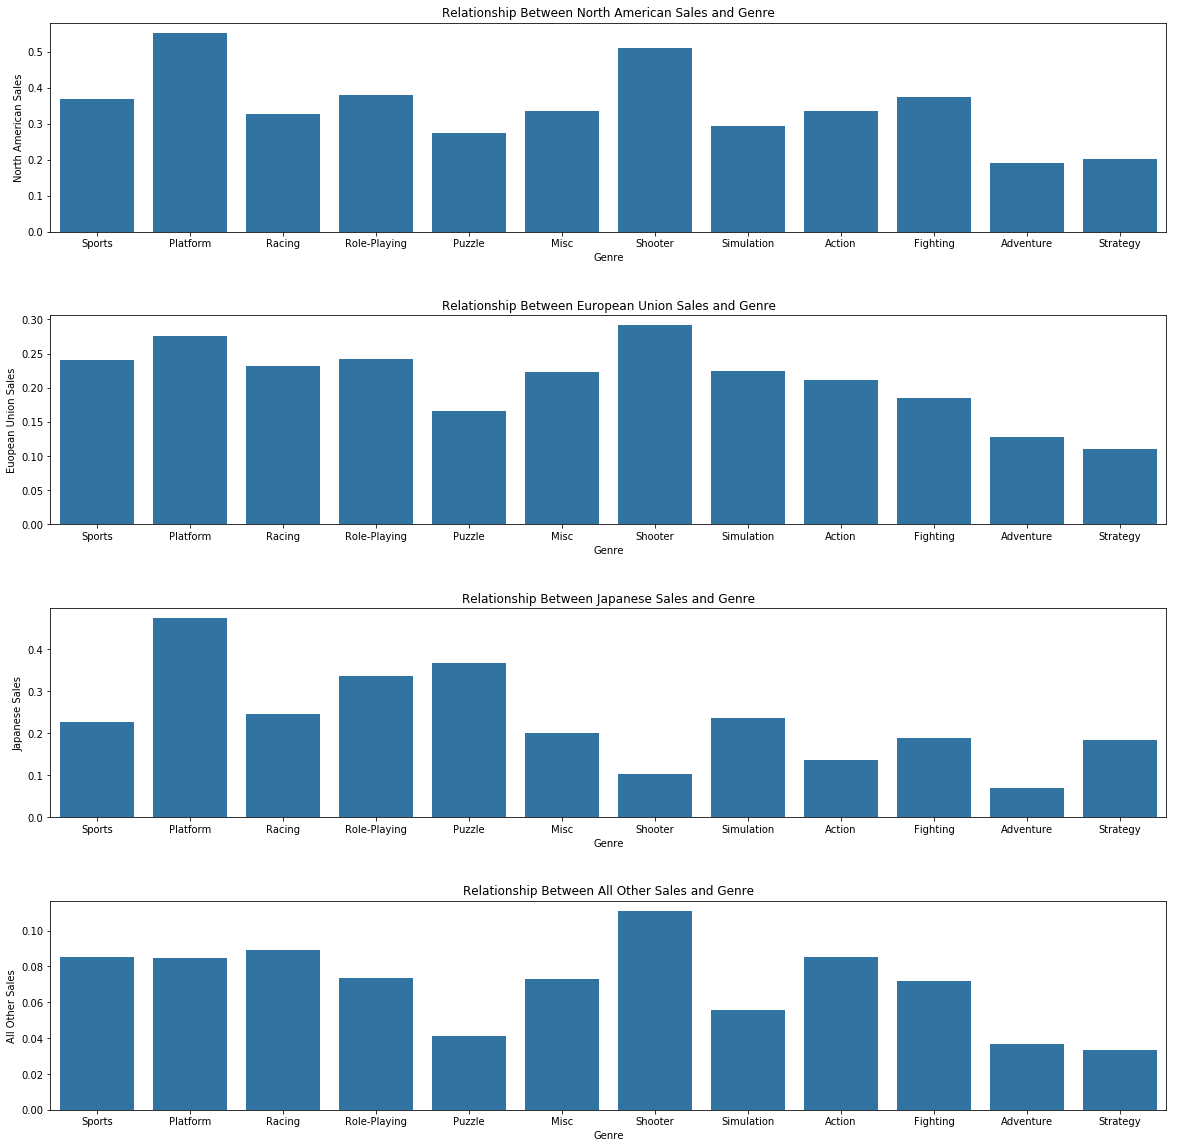

In [19]:
fig, axes = plt.subplots(4, 1, figsize = [20, 20])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.4)

# Plot relationship between North American Sales numbers and genre.
ax1 = sb.barplot(data = na_sales, x = 'Genre', y = 'NA_Sales', ax = axes[0], ci = None, color = base_color)
ax1.set_title('Relationship Between North American Sales and Genre')
ax1.set_ylabel('North American Sales')
# Plot relationship between European Union Sales numbers and genre.
ax2 = sb.barplot(data = eu_sales, x = 'Genre', y = 'EU_Sales', ax = axes[1], ci = None, color = base_color)
ax2.set_title('Relationship Between European Union Sales and Genre')
ax2.set_ylabel('Euopean Union Sales')
# Plot relationship between Japanese Sales numbers and genre.
ax3 = sb.barplot(data = jp_sales, x = 'Genre', y = 'JP_Sales', ax = axes[2], ci = None, color = base_color)
ax3.set_title('Relationship Between Japanese Sales and Genre')
ax3.set_ylabel('Japanese Sales')
# Plot relationship between All Other Sales numbers and genre.
ax4 = sb.barplot(data = other_sales, x = 'Genre', y = 'Other_Sales', ax = axes[3], ci = None, color = base_color)
ax4.set_title('Relationship Between All Other Sales and Genre')
ax4.set_ylabel('All Other Sales');

In North America, as well as the European Union, the two genres with the highest mean sales are platform and shooter, while the two with the lowest are adventure and strategy. In Japan, the two highest are platform and puzzle, while the two lowest are shooter and adventure. In all other regions, the two highest are shooter and action, while the two lowest are adventure and strategy. 

### Talk about some of the relationships you observed in this part of the investigation.

The most surprising result is the lack of coorelation between both the metacritic and user ratings with sales numbers. I found that broken down by content rating, the highest mean sales number for North America and the European Union is for 'M' rated games, while the same is true for 'E' games in Japan. I found that the early Nintendo syatems have strong median sales numbers across the developed world, while Microsoft systems have very low numbers in Japan.

## Multivariate Exploration

Now, I will explore the relationship between rating, platform and sales numbers.

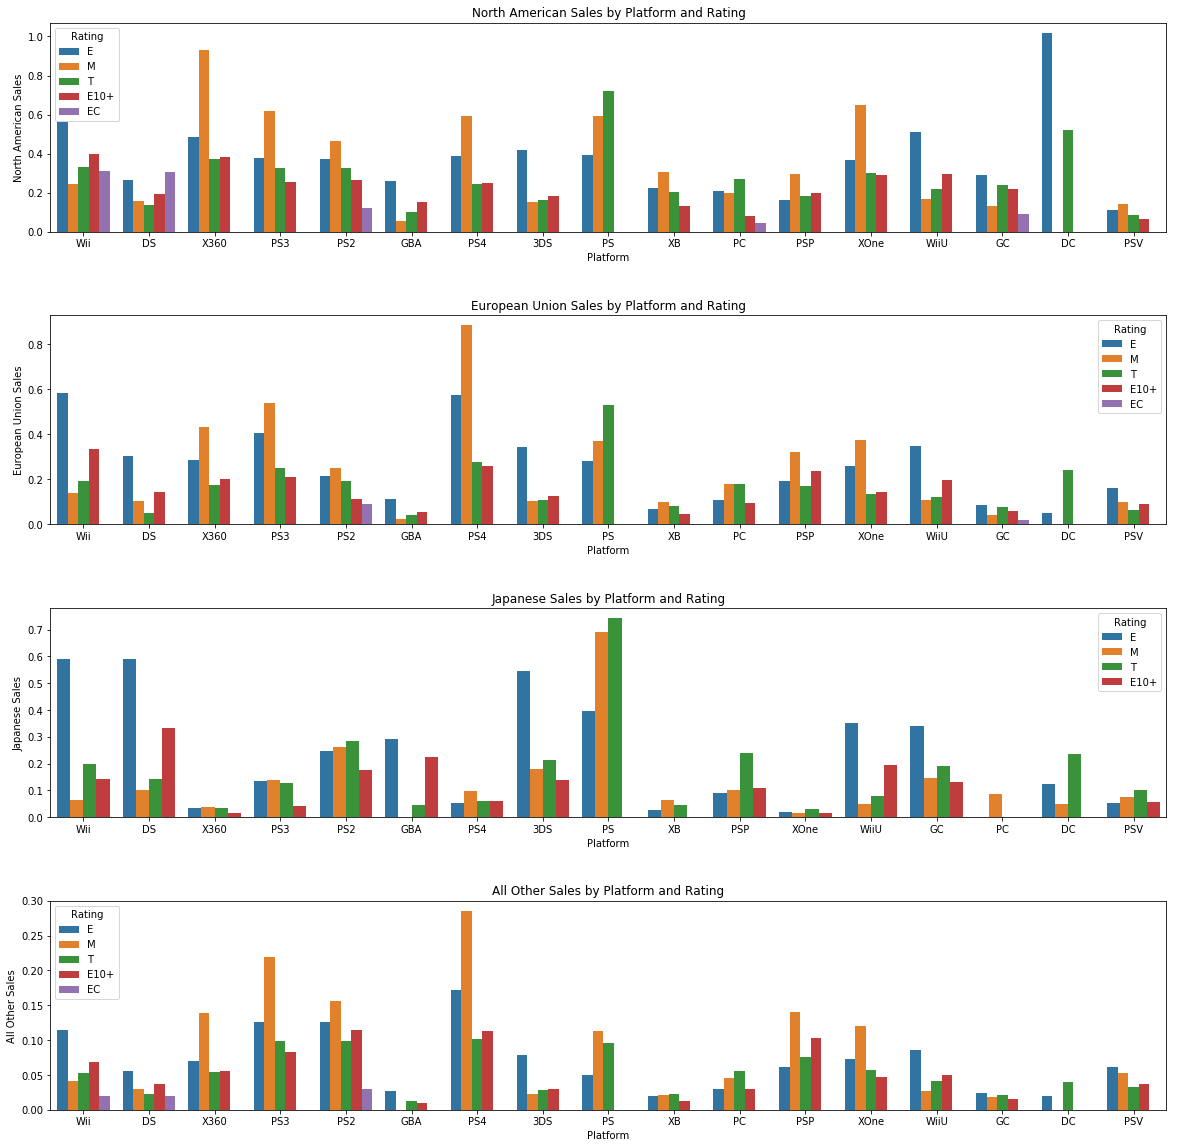

In [20]:
# Remove systems that were in retail before content rating system came out.
na_noka_sys = na_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600"]')
eu_noka_sys = eu_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600"]')
jp_noka_sys = jp_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600","WS", "NG", "TG16", "3DO", "GG", "PCFX"]')
other_noka_sys = other_noka.query('Platform not in ["NES", "GB", "SNES", "N64", "GEN", "SAT", "SCD", "2600"]')
# North American sales by platform and rating
fig, axes = plt.subplots(4, 1, figsize = [20, 20])
plt.subplots_adjust(hspace = 0.4)
ax1 = sb.barplot(data = na_noka_sys, x = 'Platform', y = 'NA_Sales', hue = 'Rating', ci = None, ax = axes[0])
ax1.set_title('North American Sales by Platform and Rating')
ax1.set_ylabel('North American Sales')
# European Union sales by platform and rating
ax2 = sb.barplot(data = eu_noka_sys, x = 'Platform', y = 'EU_Sales', hue = 'Rating', ci = None, ax = axes[1])
ax2.set_title('European Union Sales by Platform and Rating')
ax2.set_ylabel('European Union Sales')
# Japanese sales by platform and rating
ax3 = sb.barplot(data = jp_noka_sys, x = 'Platform', y = 'JP_Sales', hue = 'Rating', ci = None, ax = axes[2])
ax3.set_title('Japanese Sales by Platform and Rating')
ax3.set_ylabel('Japanese Sales')
# All other sales by platform and rating
ax4 = sb.barplot(data = other_noka_sys, x = 'Platform', y = 'Other_Sales', hue = 'Rating', ci = None, ax = axes[3])
ax4.set_title('All Other Sales by Platform and Rating')
ax4.set_ylabel('All Other Sales');

As shown above, the Nintendo systems, which are the GBA, the GC, both Wii models, and both ds models, have the highest mean sales in games geared towards younger players, with the ratings 'EC', 'E' and 'E10'. The Microsoft systems, which are the 3 Xbox models, along with the Sony systems, which are the 4 playstation models and the 2 portable playstation models, have higher mean sales numbers in games geared towards older players, with the ratings 'T' and 'M'. These findings are true in all of the regions. Next, I will be exploring the relationship between rating, genre, and sales numbers.

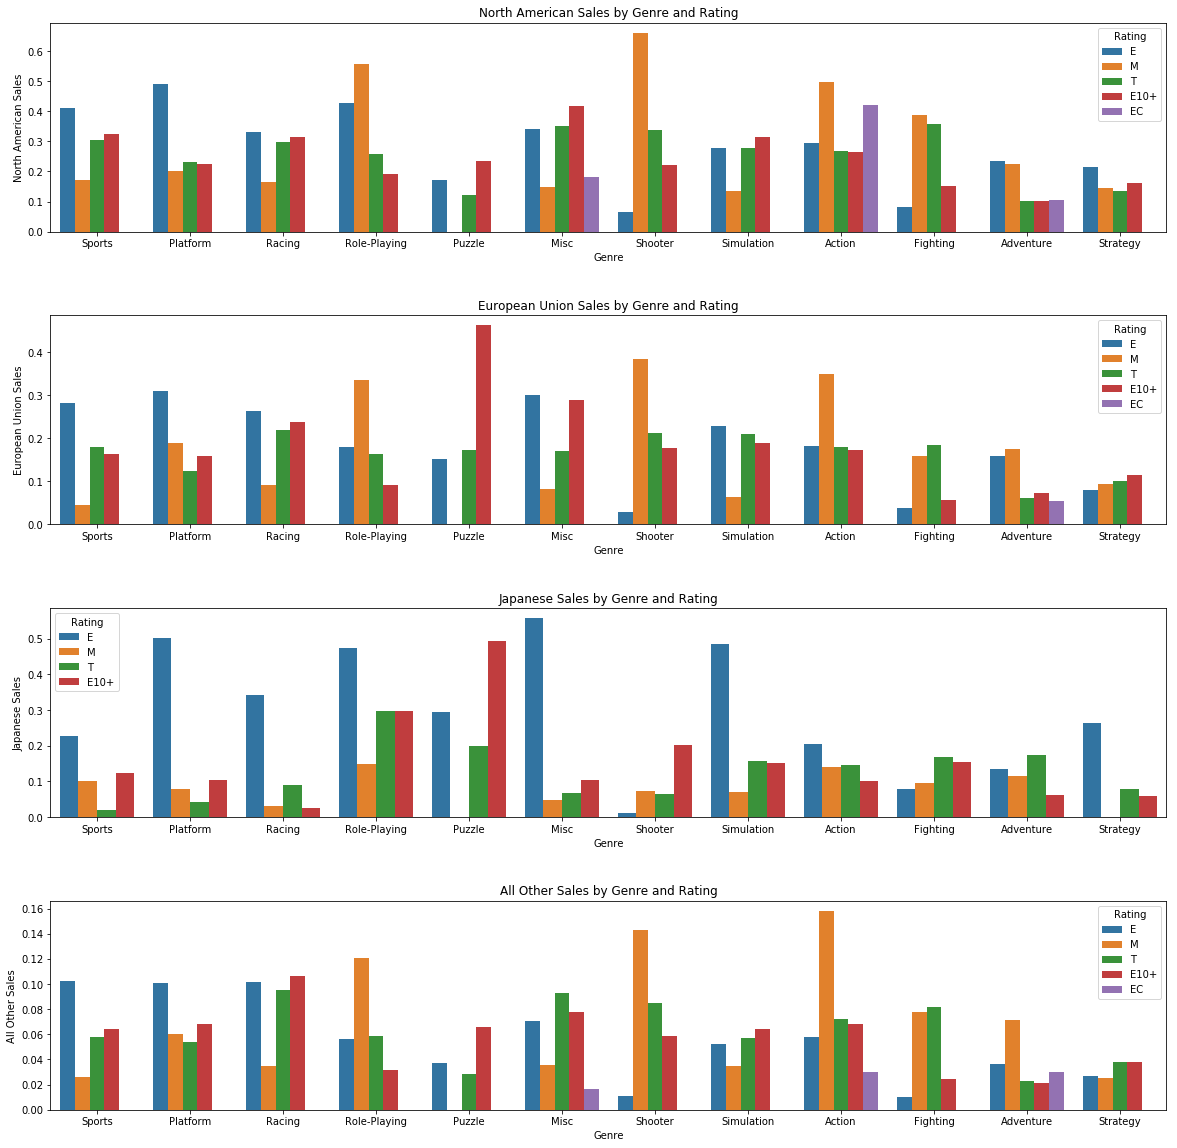

In [21]:
# North American sales by genre and rating
fig, axes = plt.subplots(4, 1, figsize = [20, 20])
plt.subplots_adjust(hspace = 0.4)
ax1 = sb.barplot(data = na_noka, x = 'Genre', y = 'NA_Sales', hue = 'Rating', ci = None, ax = axes[0])
ax1.set_title('North American Sales by Genre and Rating')
ax1.set_ylabel('North American Sales')
# European Union sales by genre and rating
ax2 = sb.barplot(data = eu_noka, x = 'Genre', y = 'EU_Sales', hue = 'Rating', ci = None, ax = axes[1])
ax2.set_title('European Union Sales by Genre and Rating')
ax2.set_ylabel('European Union Sales')
# Japanese sales by genre and rating
ax3 = sb.barplot(data = jp_noka, x = 'Genre', y = 'JP_Sales', hue = 'Rating', ci = None, ax = axes[2])
ax3.set_title('Japanese Sales by Genre and Rating')
ax3.set_ylabel('Japanese Sales')
# All other sales by genre and rating
ax4 = sb.barplot(data = other_noka, x = 'Genre', y = 'Other_Sales', hue = 'Rating', ci = None, ax = axes[3])
ax4.set_title('All Other Sales by Genre and Rating')
ax4.set_ylabel('All Other Sales');

In North America, as well as the European Union and all other regions, the top rating for the role-playing, shooter, and action genres is 'M'. In Japan, this rating is much less prevailment, while the 'E' rating dominates.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I found that in North America and the European Union, as well as all other regions, sales of games on Nintendo systems were dominated by those that had ratings of 'E' and 'E10', while with Microsoft and Sony systems, it was games with ratings of 'T' and 'M'. In Japan, the Microsoft systems and games have abysmal sales numbers, so those differences are minute. With the Nintendo systems, the 'E' and 'E10' games are even more dominant than North America and the European union mostly at the expense of 'M' Games. The two biggest sellers for the Sony systems are 'M' and 'T'.
### Were there any interesting or surprising interactions between features?

The trend of Japenese gamers gravitating towards games for younger people is evident across most genres, except the ones like 'shooter' that have an inherent amount of violence.